In [5]:
import pandas as pd

In [8]:
data = pd.read_csv('weather_data_1000.csv')

In [14]:
print("le nombre de colonnes du dataset est :", data.shape[0])
print("le nombre de lignes du dataset est :", data.shape[1])

le nombre de colonnes du dataset est : 1000
le nombre de lignes du dataset est : 8


In [167]:
print("types de données du dataset :")
print(data.dtypes)

types de données du dataset :
Date             datetime64[ns]
Temperature             float64
Precipitation             int64
Humidity                float64
Latitude                float64
Longitude               float64
Temperature_F           float64
Is_Hot                    int64
Fahrenheit              float64
dtype: object


In [24]:
print("Analyse descriptive du dataset : ")
print(data.describe())

Analyse descriptive du dataset : 
       Temperature  Precipitation     Humidity     Latitude    Longitude  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.034800       1.840000    51.108500    -2.700336    -0.852300   
std      10.802857       4.368465    15.957884    51.069420   103.561562   
min     -12.900000       0.000000    30.000000   -89.994471  -179.918266   
25%       0.000000       0.000000    36.175000   -47.278395   -89.179462   
50%      10.500000       0.000000    50.600000    -3.121833    -6.150004   
75%      20.000000       0.000000    64.200000    40.446042    90.473408   
max      32.300000      20.000000   100.000000    89.920387   179.565457   

       Temperature_F       Is_Hot  
count    1000.000000  1000.000000  
mean       50.062640     0.073000  
std        19.445142     0.260267  
min         8.780000     0.000000  
25%        32.000000     0.000000  
50%        50.900000     0.000000  
75%        68.000000     0.00

In [27]:
data.columns

Index(['Date', 'Temperature', 'Precipitation', 'Humidity', 'Latitude',
       'Longitude', 'Temperature_F', 'Is_Hot'],
      dtype='object')

In [34]:
print("la temperature maximale est : ", data['Temperature'].max())
print("la temperature minimale est : ", data['Temperature'].min())

la temperature maximale est :  32.3
la temperature minimale est :  -12.9


In [48]:
print("les valeurs null par colonne: ")
print(data.isna().sum())

les valeurs null par colonne: 
Date             0
Temperature      0
Precipitation    0
Humidity         0
Latitude         0
Longitude        0
Temperature_F    0
Is_Hot           0
dtype: int64


In [58]:
print("remplacer les valeurs null par la moyenne des temperatures")
data.fillna(data["Temperature"].mean(), inplace=True)

remplacer les valeurs null par la moyenne des temperatures


In [74]:
print("ajouter la colonne Fahrenheit")
data["Fahrenheit"] = data["Temperature"]*9/5 + 32

ajouter la colonne Fahrenheit


In [82]:
print("Afficher les lignes où la temperature depasse les 30")
data[data["Temperature"]>30]

Afficher les lignes où la temperature depasse les 30


,Date,Temperature,Precipitation,Humidity,Latitude,Longitude,Temperature_F,Is_Hot,Fahrenheit
159,2023-02-22 00:00:00,31.1,0,72.6,25.470807,-109.264692,87.98,1,87.98
226,2023-03-17 18:00:00,30.9,0,58.2,-82.931505,138.412342,87.62,1,87.62
254,2023-03-29 04:00:00,32.3,0,62.8,-68.720648,-68.510984,90.14,1,90.14
255,2023-03-29 10:00:00,31.9,0,78.9,12.889377,127.194187,89.42,1,89.42
276,2023-04-08 03:00:00,30.6,0,63.3,62.659662,34.331893,87.08,1,87.08
295,2023-04-14 04:00:00,30.3,0,65.2,-5.747570,129.062324,86.54,1,86.54
308,2023-04-19 13:00:00,32.0,0,79.3,-12.101133,-25.793352,89.60,1,89.60
315,2023-04-22 02:00:00,30.3,0,74.8,60.055922,139.488818,86.54,1,86.54
322,2023-04-25 07:00:00,31.3,0,76.8,-15.220260,-52.749651,88.34,1,88.34


In [204]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'occurences')

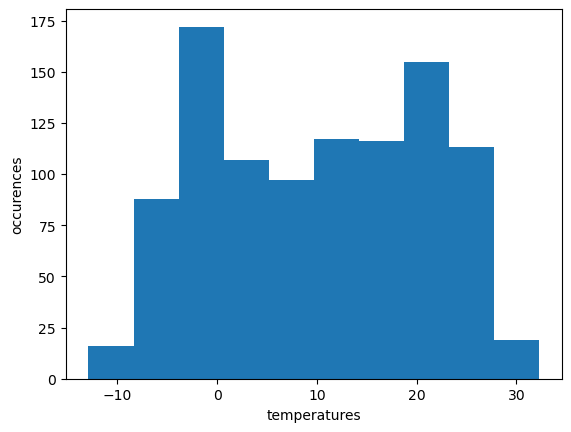

In [93]:
plt.hist(data["Temperature"])
plt.xlabel("temperatures")
plt.ylabel("occurences")

In [98]:
import seaborn as sns

<Axes: xlabel='Temperature', ylabel='Precipitation'>

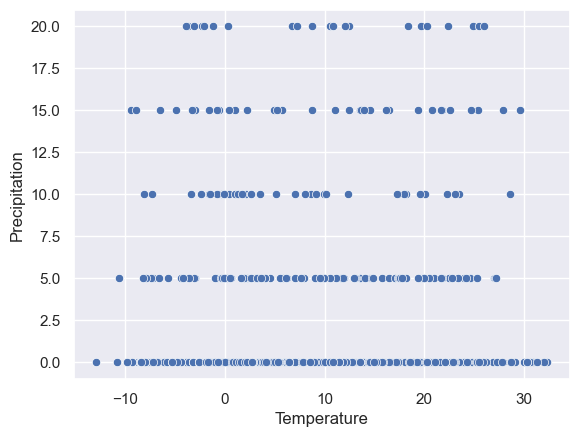

In [189]:
sns.set_theme(style="darkgrid")
temperature_precipitation = data[["Temperature","Precipitation"]] 
sns.scatterplot(x="Temperature",y="Precipitation",data=temperature_precipitation)

In [187]:
print("convertir la date en un objet datetime")
data["Date"] = pd.to_datetime(data["Date"])

convertir la date en un objet datetime


variations de la temperature par rapport au temps


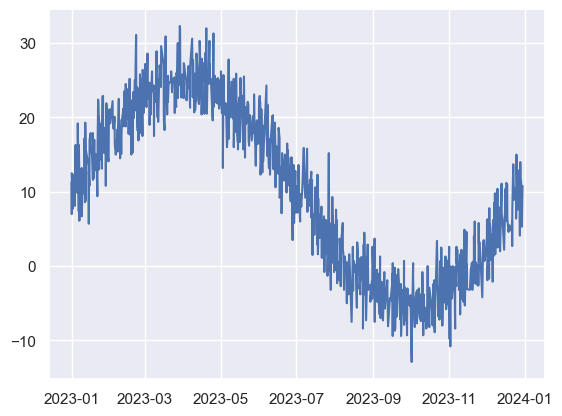

In [158]:
print("variations de la temperature par rapport au temps")
plt.plot(data["Date"], data["Temperature"])

In [176]:
print("Affichage de la matrice de correlation : ")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
datanumeric = data.select_dtypes(include=numerics)
datanumeric.corr()

Affichage de la matrice de correlation : 


,Temperature,Precipitation,Humidity,Latitude,Longitude,Temperature_F,Is_Hot,Fahrenheit
Temperature,1.000000,-0.029378,0.820507,0.015237,0.032043,1.000000,0.441062,1.000000
Precipitation,-0.029378,1.000000,-0.027414,-0.000178,0.025373,-0.029378,-0.003803,-0.029378
Humidity,0.820507,-0.027414,1.000000,0.032042,0.014704,0.820507,0.334618,0.820507
Latitude,0.015237,-0.000178,0.032042,1.000000,-0.056020,0.015237,0.023262,0.015237
Longitude,0.032043,0.025373,0.014704,-0.056020,1.000000,0.032043,0.064106,0.032043
Temperature_F,1.000000,-0.029378,0.820507,0.015237,0.032043,1.000000,0.441062,1.000000
Is_Hot,0.441062,-0.003803,0.334618,0.023262,0.064106,0.441062,1.000000,0.441062
Fahrenheit,1.000000,-0.029378,0.820507,0.015237,0.032043,1.000000,0.441062,1.000000


<Axes: >

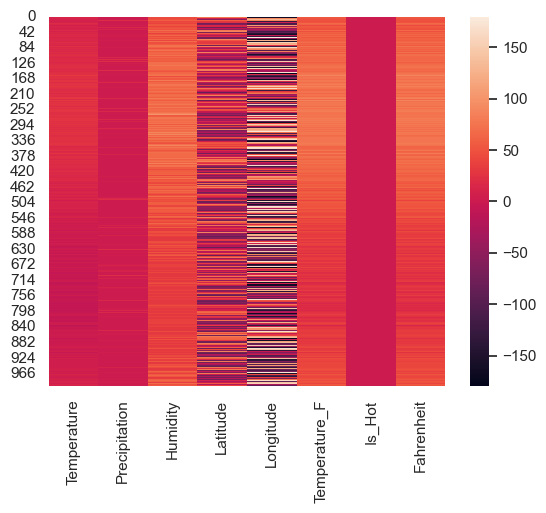

In [179]:
sns.heatmap(datanumeric)

In [194]:
data.to_csv("cleaned_weather_data.csv",index=False)

JOB DONE